# Speech Emotion Recognition:

-  The objective of this project is to develop a robust speech emotion recognition system capable of accurately classifying the emotional states conveyed in spoken language. By analyzing the acoustic features of speech signals, the system should be able to categorize emotions such as happiness, sadness, anger, fear, and more.

# Importing Dependencies:

In [57]:
import os, warnings
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

from pathlib import Path
from scipy.io import wavfile
from IPython import display
from librosa import display
import librosa
import soundfile

In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
img_dir = Path('../input/speech-emotion-recognition-en/Crema')
img_dir


PosixPath('../input/speech-emotion-recognition-en/Crema')

In [16]:
filepaths = list(img_dir.glob(r'**/*.wav'))
len(filepaths)

7442

In [18]:
labels = list(map(lambda x: os.path.split(x)[1].split('_')[2], filepaths))
labels[:5]

['DIS', 'HAP', 'HAP', 'DIS', 'DIS']

In [98]:
attributes = set(labels)
attributes

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

### Creating Data frames for easiness:

In [31]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='label')
data = pd.concat([filepaths, labels], axis=1)
data[:10]

,Filepath,label
0,../input/speech-emotion-recognition-en/Crema/1...,DIS
1,../input/speech-emotion-recognition-en/Crema/1...,HAP
2,../input/speech-emotion-recognition-en/Crema/1...,HAP
3,../input/speech-emotion-recognition-en/Crema/1...,DIS
4,../input/speech-emotion-recognition-en/Crema/1...,DIS
5,../input/speech-emotion-recognition-en/Crema/1...,DIS
6,../input/speech-emotion-recognition-en/Crema/1...,HAP
7,../input/speech-emotion-recognition-en/Crema/1...,SAD
8,../input/speech-emotion-recognition-en/Crema/1...,DIS
9,../input/speech-emotion-recognition-en/Crema/1...,SAD


## Data Visualization:

<Axes: xlabel='label', ylabel='count'>

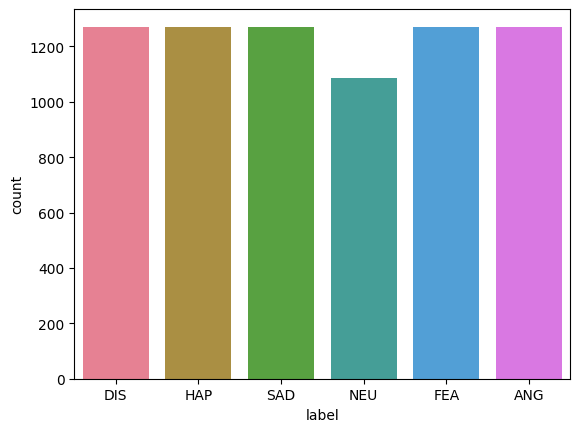

In [32]:
sns.countplot(data=data, x='label', palette='husl')

In [33]:
def waveplot(data, sampling_rate, emotion):
    plt.figure(figsize=(12,6))
    plt.title(emotion, size=15)
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.show()

def spectrogram(data, sampling_rate, emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12, 6))
    plt.title(emotion,size=15)
    librosa.display.specshow(x_db, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

In [35]:
audio = []
for i in data['Filepath']:
    x, sr = librosa.load(i, sr=44100)
    audio.append(x)

data['content'] = audio

In [36]:
data.head(10)

,Filepath,label,content
0,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[0.0051987115, 0.0067456197, 0.0065078777, 0.0..."
1,../input/speech-emotion-recognition-en/Crema/1...,HAP,"[-0.0054751206, -0.00713885, -0.0067585437, -0..."
2,../input/speech-emotion-recognition-en/Crema/1...,HAP,"[-2.10721e-05, 0.00013225194, 0.00036462393, 0..."
3,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[0.0027296818, 0.0025122813, 0.0009894323, 4.4..."
4,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[-0.0012989982, -0.0016537481, -0.0013569102, ..."
5,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[-0.005452559, -0.0069668284, -0.006431949, -0..."
6,../input/speech-emotion-recognition-en/Crema/1...,HAP,"[0.002299612, 0.002976039, 0.0028013452, 0.002..."
7,../input/speech-emotion-recognition-en/Crema/1...,SAD,"[-0.0006992619, -0.0012448956, -0.0015337203, ..."
8,../input/speech-emotion-recognition-en/Crema/1...,DIS,"[-0.0010671107, -0.00108796, -0.0006300568, -0..."
9,../input/speech-emotion-recognition-en/Crema/1...,SAD,"[0.0046159793, 0.005888169, 0.0053729094, 0.00..."


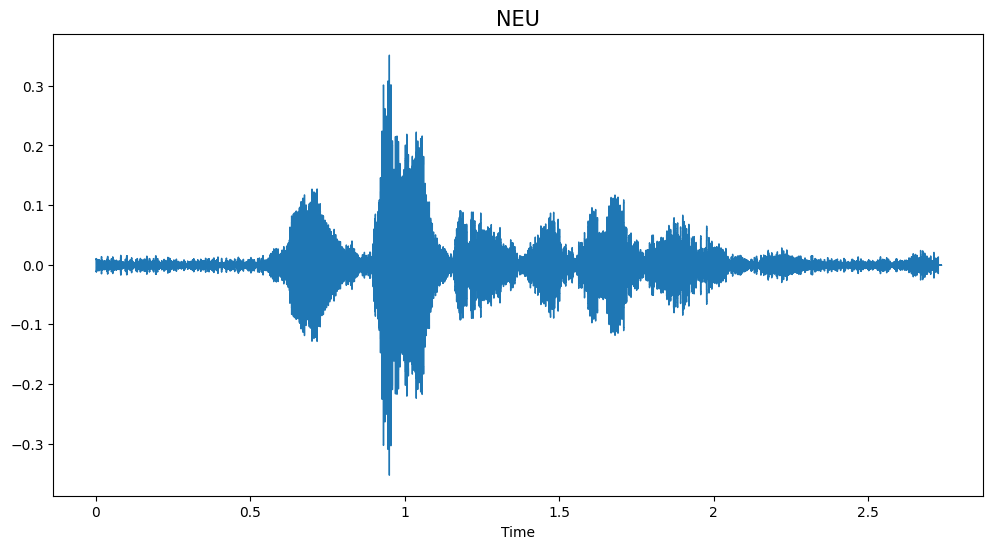

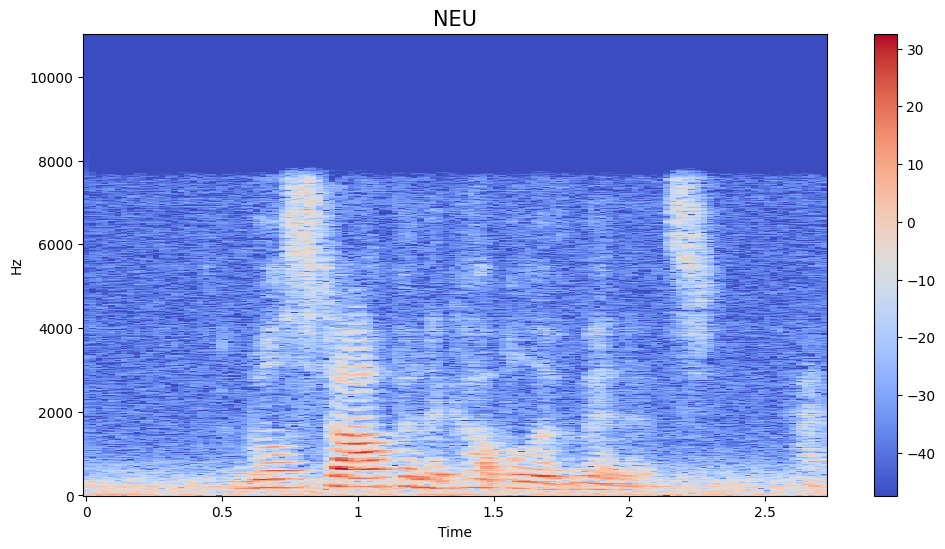

In [113]:
emotion = list(attributes)[0]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

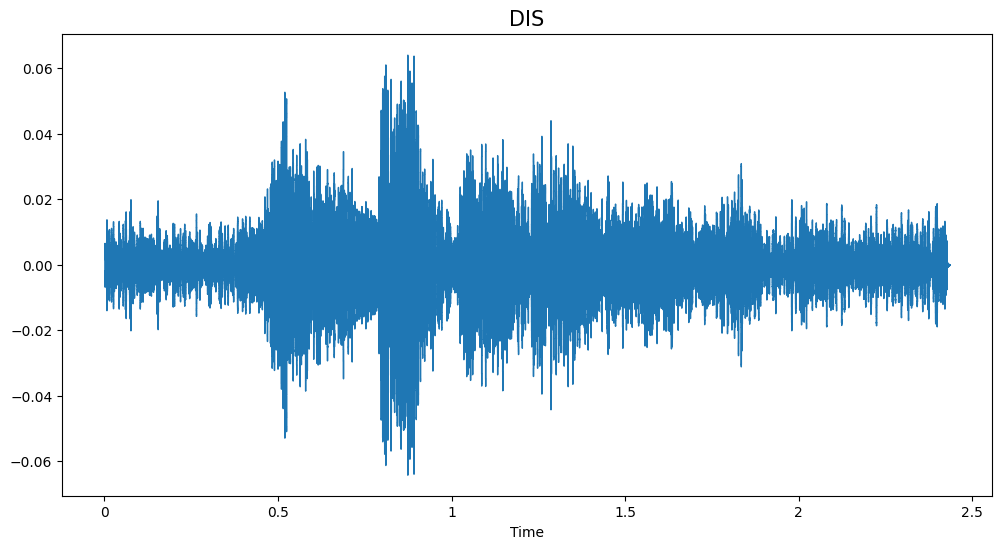

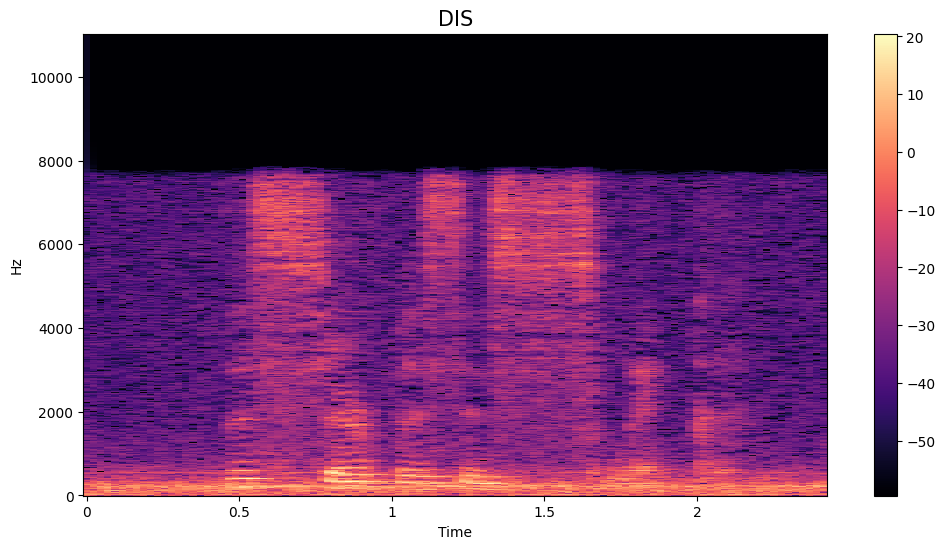

In [112]:
emotion =list(attributes)[1]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

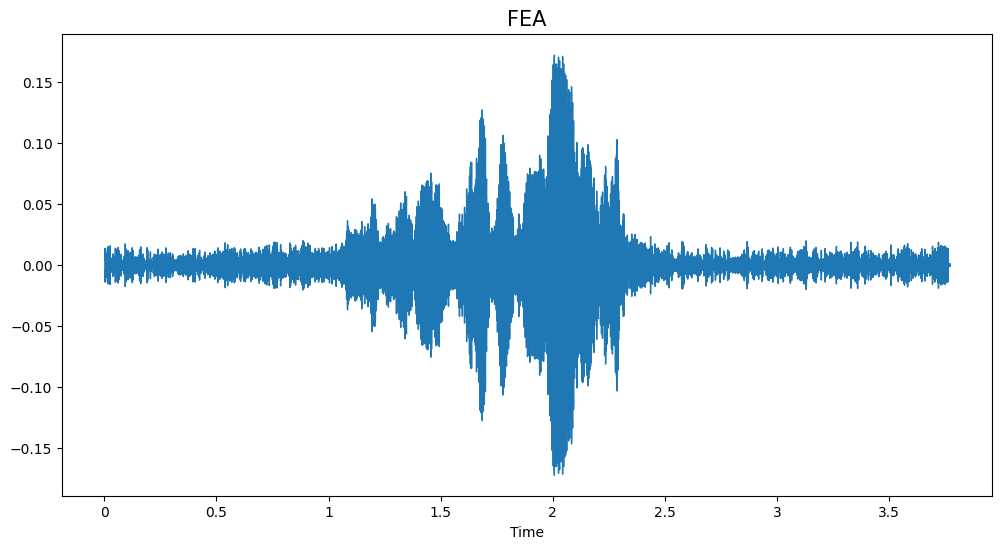

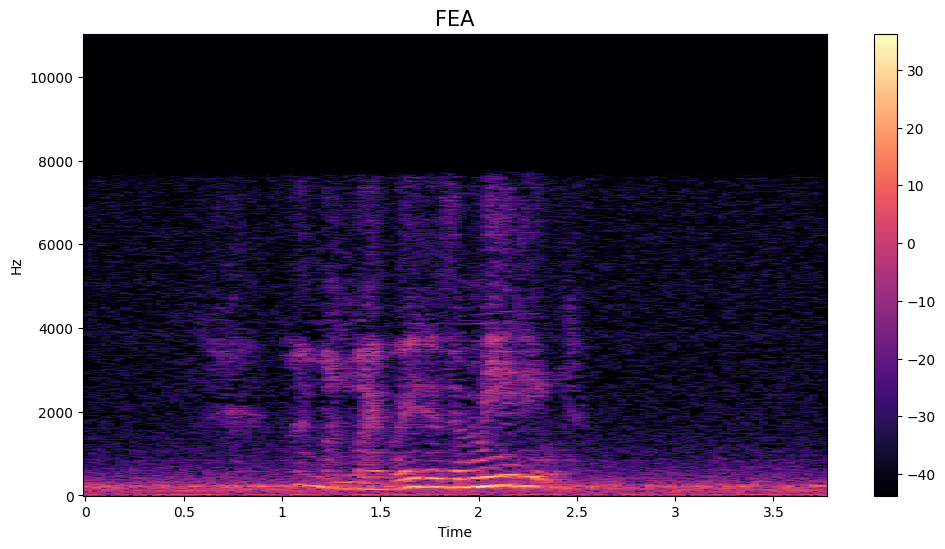

In [111]:
emotion =list(attributes)[2]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

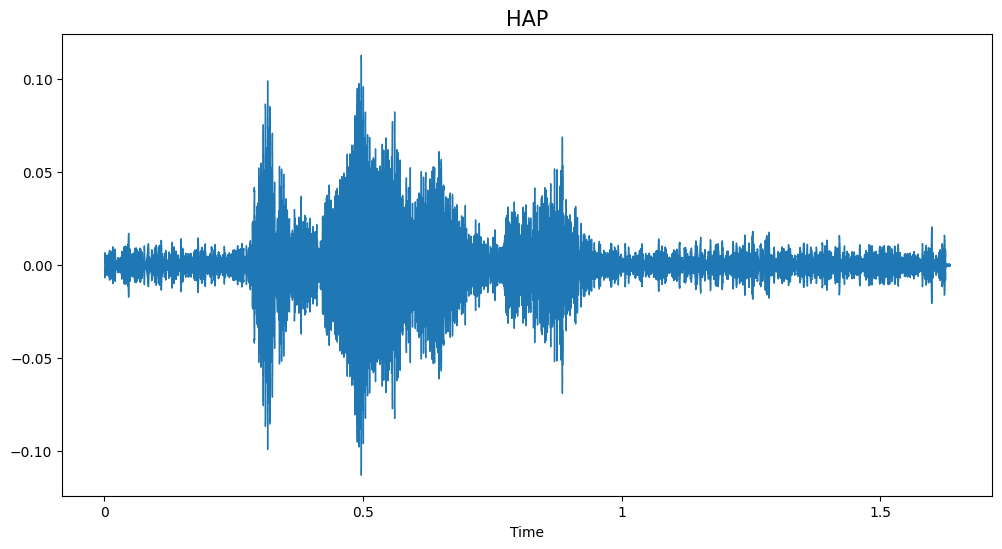

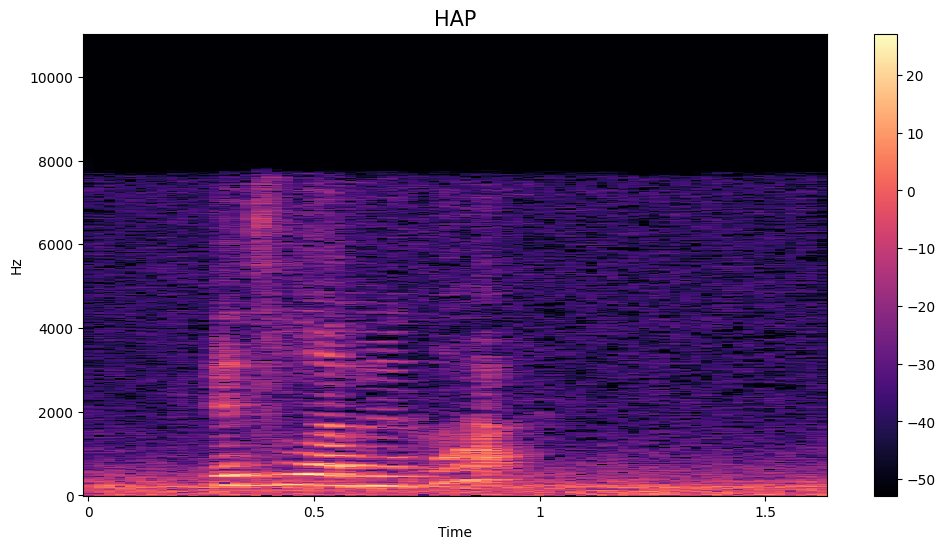

In [110]:
emotion =list(attributes)[3]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

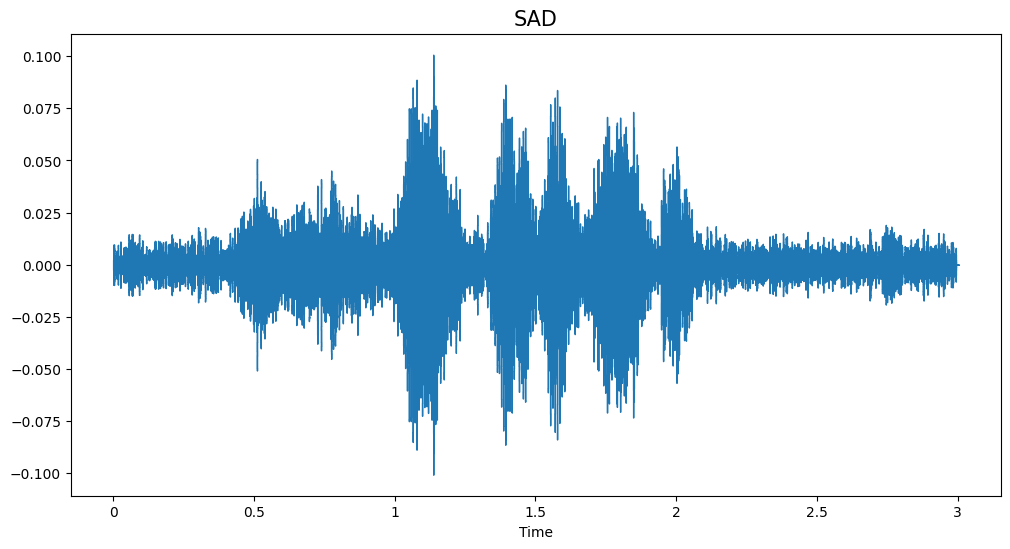

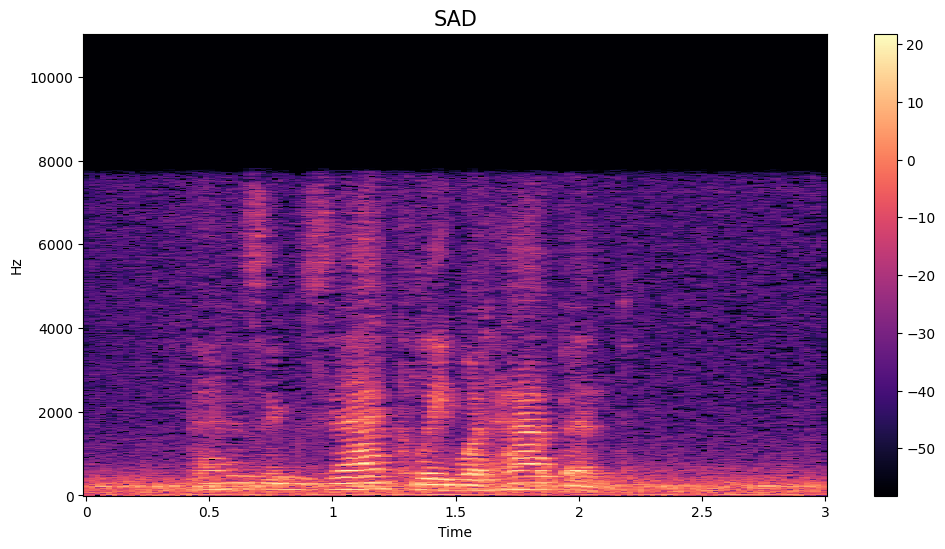

In [109]:
emotion =list(attributes)[4]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

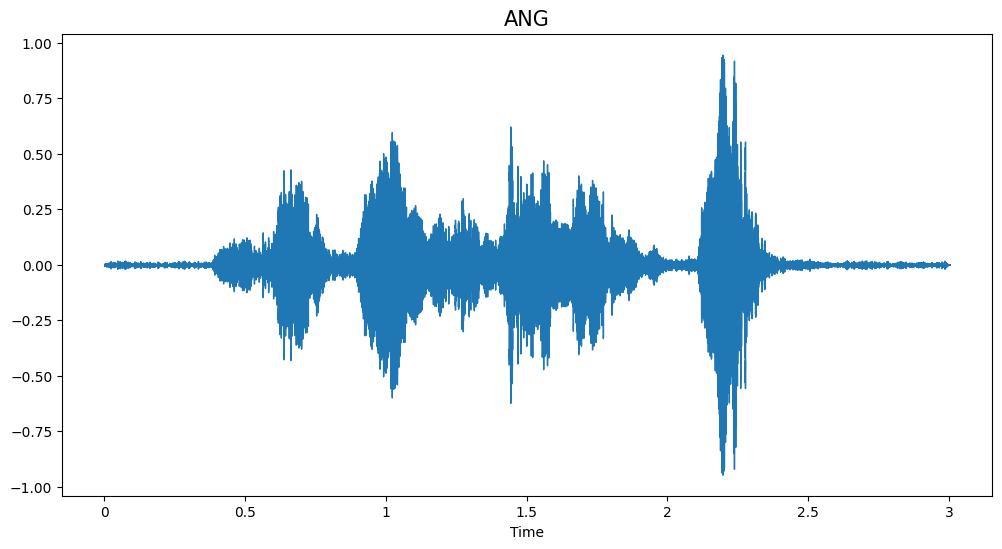

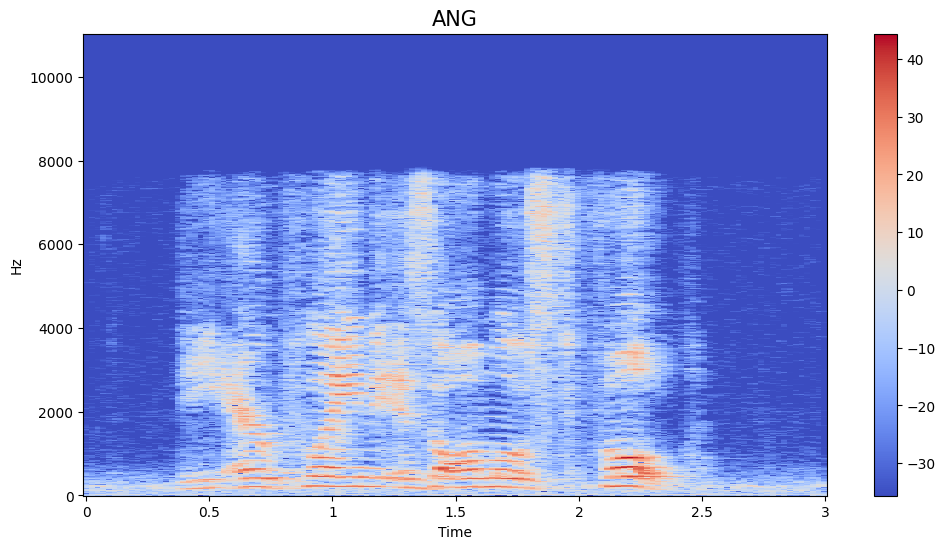

In [107]:
emotion =list(attributes)[5]
path = data['Filepath'][data['label'] == emotion].iloc[0]
d, sampling_rate = librosa.load(path)
waveplot(d, sampling_rate, emotion)
spectrogram(d, sampling_rate, emotion)

---

## Data Augmentation:

In [87]:
def noise(data):
    noise_amplification = np.random.uniform()*np.amax(data)*0.035
    data = data + noise_amplification*np.random.normal(size=data.shape[0])
    return data

def stretching(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

def pitch(data, sr, pitch_fac=0.7):
#     librosa.effects.pitch_shif
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=pitch_fac)

### Feature extraction:

In [88]:
def feature_extraction(data):
    result = np.array([])
    zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zero_crossing_rate))
    
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sr, n_fft=200).T, axis=0)
    result = np.hstack((result,mfcc))
    
    tonnetz = np.mean(librosa.feature.tonnetz(y=data, sr=sr).T, axis=0);
    result = np.hstack((result, tonnetz));
    
    return result

In [115]:
def feature_fetching(data):
    result =[]
    
    ans1 = feature_extraction(data)
    result.append(ans1)
    
    noise_data = noise(data)
    ans2 = feature_extraction(noise_data)
    result.append(ans2)
    
    data_new = stretching(data)
    data_stretch_pitch = pitch(data_new, sr)
    ans3 = feature_extraction(data_stretch_pitch)
    result.append(ans3)
    return result

In [116]:
feat = feature_fetching(data['content'][0])
feat

[array([ 4.89955357e-02,  6.52040541e-01,  6.57600641e-01,  6.69401407e-01,
         6.66335344e-01,  6.62725449e-01,  6.95699036e-01,  6.45165682e-01,
         7.03055799e-01,  7.63950229e-01,  8.32651913e-01,  7.94080615e-01,
         7.50278652e-01, -8.54584229e+02,  2.52769680e+01, -6.78903809e+01,
         5.34174423e+01,  3.13524032e+00, -2.72168293e+01,  1.24889994e+01,
        -2.13980770e+01, -7.21670055e+00, -2.16059518e+00, -2.19282036e+01,
         6.34785986e+00, -8.33503628e+00, -1.89396057e+01,  2.86841798e+00,
        -9.64516640e+00, -8.10505295e+00, -6.54545546e+00, -1.30564241e+01,
         1.97651279e+00, -5.80677476e-03, -1.60242868e-02, -7.52282508e-02,
        -1.12864194e-02,  6.96216021e-03, -5.75429525e-04]),
 array([ 5.19275484e-02,  6.60591652e-01,  6.66505922e-01,  6.77768680e-01,
         6.74499822e-01,  6.70698731e-01,  7.00384749e-01,  6.46955927e-01,
         7.04638770e-01,  7.64780540e-01,  8.31884264e-01,  7.94089590e-01,
         7.53927139e-01, -8

In [117]:
X = []
y = []
for i in range(len(data)):
    feature = feature_fetching(data['content'].iloc[i])
    for j in feature:
        X.append(j)
        y.append(data['label'].iloc[i])

In [132]:
np.array(X).shape

(22326, 39)

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM, Flatten, BatchNormalization
from keras import optimizers

In [122]:
# Encoding labels:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

## Train Test Split:

In [150]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

In [151]:
X_train.shape

(17860, 39)

In [152]:
y[1]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [153]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
X_train.shape

## Creating Model:

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, LSTM, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers

In [160]:
model = Sequential()


model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 128)           0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 8, 128)            131584    
                                                                 
 lstm_5 (LSTM)               (None, 128)              

## Training Model:

In [161]:
hist = model.fit(X_train, y_train, 
                epochs=30, 
                batch_size=64,
                validation_data=(X_test, y_test))

Epoch 1/30
280/280 [==============================] - 17s 43ms/step - loss: 1.6383 - accuracy: 0.2973 - val_loss: 1.5409 - val_accuracy: 0.3643
Epoch 2/30
280/280 [==============================] - 11s 40ms/step - loss: 1.5636 - accuracy: 0.3413 - val_loss: 1.5317 - val_accuracy: 0.3580
Epoch 3/30
280/280 [==============================] - 11s 38ms/step - loss: 1.5415 - accuracy: 0.3500 - val_loss: 1.5181 - val_accuracy: 0.3739
Epoch 4/30
280/280 [==============================] - 11s 40ms/step - loss: 1.5236 - accuracy: 0.3599 - val_loss: 1.5444 - val_accuracy: 0.3484
Epoch 5/30
280/280 [==============================] - 11s 40ms/step - loss: 1.5156 - accuracy: 0.3646 - val_loss: 1.5667 - val_accuracy: 0.3439
Epoch 6/30
280/280 [==============================] - 11s 39ms/step - loss: 1.5227 - accuracy: 0.3592 - val_loss: 1.5006 - val_accuracy: 0.3704
Epoch 7/30
280/280 [==============================] - 11s 39ms/step - loss: 1.4998 - accuracy: 0.3745 - val_loss: 1.5472 - val_accuracy:

# Conclusion:

In [165]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

140/140 [==============================] - 2s 12ms/step - loss: 1.4491 - accuracy: 0.4053
Test Accuracy: 0.4052843749523163


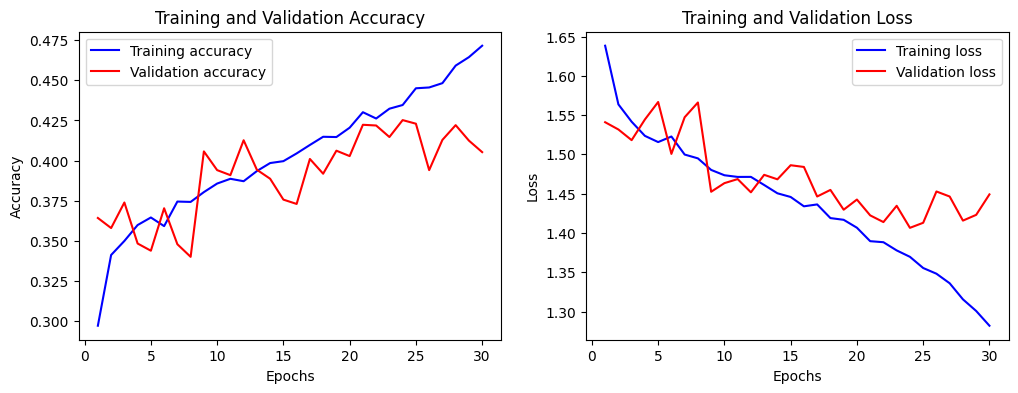

In [166]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()